In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['MCD', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
pf_data.head()

,MCD,^GSPC
Date,,
2010-01-04,45.339836,1132.989990
2010-01-05,44.993195,1136.520020
2010-01-06,44.379295,1137.140015
2010-01-07,44.704296,1141.689941
2010-01-08,44.660969,1144.979980


In [4]:
pf_data.tail()

,MCD,^GSPC
Date,,
2020-09-17,222.580002,3357.010010
2020-09-18,220.270004,3319.469971
2020-09-21,216.410004,3281.060059
2020-09-22,216.410004,3315.570068
2020-09-23,218.320007,3291.030029


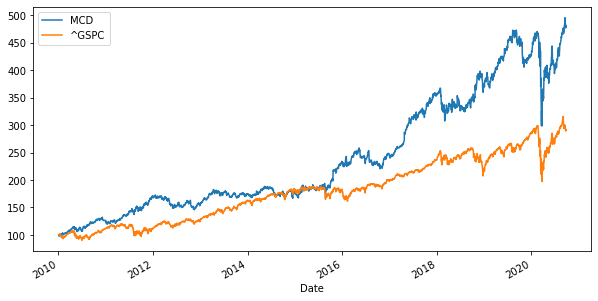

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

MCD      0.145589
^GSPC    0.098772
dtype: float64

In [8]:
log_returns.cov() * 250

,MCD,^GSPC
MCD,0.036610,0.021311
^GSPC,0.021311,0.030644


In [9]:
log_returns.corr()

,MCD,^GSPC
MCD,1.00000,0.63626
^GSPC,0.63626,1.00000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

2

In [12]:
arr = np.random.random(2)
arr

array([0.68122322, 0.66026794])

In [13]:
arr[0] + arr[1]

1.3414911654369062

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.51159681, 0.48840319])

In [15]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.12272319383135384

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.027541439224131915

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.16595613644614626

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.10549775387542541,
  0.1340330000456989,
  0.12540863493465895,
  0.14110309438688132,
  0.11437105797753558,
  0.13197414396490434,
  0.1229836417028845,
  0.10783900158083824,
  0.1413563090831794,
  0.1428356959291067,
  0.12399987357154199,
  0.09995729499562374,
  0.11935957533626941,
  0.11219265726030177,
  0.13405098440872507,
  0.10890999074982666,
  0.11209059493881313,
  0.13371313844147217,
  0.12496554074033288,
  0.12031472126610362,
  0.10071682595490106,
  0.13330764165633335,
  0.12145884771560903,
  0.12250801357996431,
  0.10964002309754615,
  0.12305397795825217,
  0.11872251056863818,
  0.10626504506545587,
  0.12530724652685812,
  0.14171914121296175,
  0.11639415576709283,
  0.1299134221800282,
  0.1266566687857106,
  0.13589246843413638,
  0.10979878716268547,
  0.12420916907321847,
  0.13071604652812097,
  0.12195854086643416,
  0.1399923611669732,
  0.12247806461227242,
  0.10725547884690566,
  0.1446807893833776,
  0.11923733590040551,
  0.134250919557571

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.10972341, 0.12006485, 0.1130829 , 0.13348072, 0.12530644,
        0.1220583 , 0.1232232 , 0.11911729, 0.12430395, 0.12020372,
        0.12166607, 0.13490795, 0.12651702, 0.12010663, 0.12497359,
        0.10897837, 0.12513561, 0.12170534, 0.12054182, 0.13680723,
        0.13881124, 0.11693962, 0.12479771, 0.11118621, 0.1208818 ,
        0.12688301, 0.12916197, 0.14431421, 0.10352612, 0.11952316,
        0.13714935, 0.13477991, 0.10599365, 0.10580351, 0.12703272,
        0.1427274 , 0.12052818, 0.10127231, 0.13238268, 0.12307665,
        0.11792556, 0.12130401, 0.11926458, 0.1211815 , 0.12062597,
        0.12809339, 0.1024231 , 0.13567   , 0.13487856, 0.1186941 ,
        0.09914524, 0.12035063, 0.13484059, 0.10460615, 0.12077641,
        0.10861107, 0.10126945, 0.11048312, 0.11504927, 0.14005436,
        0.10809945, 0.11144836, 0.12422861, 0.12847216, 0.12502967,
        0.13211109, 0.13084978, 0.12362647, 0.12181854, 0.12268323,
        0.12009816, 0.10993686, 0.10620329, 0.11

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Return,Volatility
0,0.109723,0.166209
1,0.120065,0.165075
2,0.113083,0.165045
3,0.133481,0.174195
4,0.125306,0.167264


In [23]:
portfolios.tail()

,Return,Volatility
995,0.120154,0.165097
996,0.123588,0.166345
997,0.128567,0.169532
998,0.105980,0.168386
999,0.124708,0.166922


Text(0, 0.5, 'Expected Return')

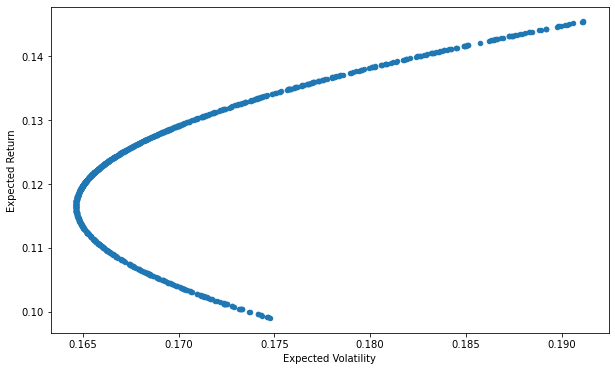

In [24]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')